# Practice with MoonLander

In [1]:
import torch
import matplotlib.pyplot as plt
import gym

In [2]:
env = gym.make("LunarLander-v2")

In [4]:
"""
Actions: {0: Do Nothing, 1: Fire left engine (go/rotate right), 2: Fire main engine,
 3: Fire right engine}

"""
num_episodes = 1000
num_states = env.observation_space.shape[0]  
num_actions = env.action_space.n
print(num_states, num_actions)

8 4


In [ ]:
"""This obviously does not work well since the Lunar Lander is more complex
Resulting simulations are very slow to land, presumably incurring a large fuel penalty
"""
from random_search import random_search
env.reset()
best_reward, best_weight, total_rewards = random_search(env, num_states, num_actions, num_episodes)
print(f"Average reward, {num_episodes} iterations: {sum(total_rewards) / num_episodes}")
print(f"Best Reward: {best_reward:.2f}")

In [5]:
"""Still very, very bad"""
from hill_climb import hill_climb
env.reset()
best_reward, best_weight, total_rewards = hill_climb(env, num_states, num_actions, num_episodes)
print(f"Average reward, {num_episodes} iterations: {sum(total_rewards) / num_episodes}")
print(f"Best Reward: {best_reward:.2f}")

Episode: 20 	 Total reward: -457.278917924168
Episode: 40 	 Total reward: -468.3410528483711
Episode: 60 	 Total reward: -690.9356293181885
Episode: 80 	 Total reward: -102.57198014036405
Episode: 100 	 Total reward: -166.8158423484835
Episode: 120 	 Total reward: -595.7680563105281
Episode: 140 	 Total reward: -453.44776024491256
Episode: 160 	 Total reward: -568.8645817060193
Episode: 180 	 Total reward: -126.1733759681754
Episode: 200 	 Total reward: -454.3326022792617
Episode: 220 	 Total reward: -174.72428312031602
Episode: 231 	 Total reward: 0.8537870095226907
Episode: 240 	 Total reward: -344.26905899746055
Episode: 260 	 Total reward: -643.1892450066824
Episode: 280 	 Total reward: -355.68040483817634
Episode: 300 	 Total reward: -635.1612331585414
Episode: 320 	 Total reward: -295.2157076777818
Episode: 328 	 Total reward: 26.79815517044851
Episode: 333 	 Total reward: 168.49959776598348
Episode: 340 	 Total reward: -159.55689804130733
Episode: 360 	 Total reward: -270.371817

In [15]:
import torch.nn as nn 
# DOES NOT WORK DUE TO THE BERNOULI CHOICE METHOD, WILL FIX LATER.
def run_grad_episode(env, weight):
    state = env.reset()
    grads = []
    total_reward = 0
    is_done = False
    softmax = nn.Softmax(dim=0)
    while not is_done:
        state = torch.from_numpy(state).float()
        """ Gradient Update """
        z = torch.matmul(state, weight)
        proba = softmax(z)
        print(z, proba)
        # action = 
        is_done = True
        break
        action = int(torch.bernoulli(proba[1]).item())       
        """ probability -> binary selection (Monte Carlo) """
        d_softmax = torch.diag(proba) - proba.view(-1, 1) * proba
        d_log = d_softmax[action] / proba[action]
        grad = state.view(-1, 1) * d_log
        grads.append(grad)

        state, reward, is_done, info = env.step(action)
        total_reward += reward
    return total_reward, grads


def mc_policy_gradients(env, dims, num_episodes, eta=0.01):
    weight = torch.rand(dims)
    total_rewards = []

    for episode in range(num_episodes):
        reward, grads = run_grad_episode(env, weight)
        for i, grad in enumerate(grads):
            weight += eta * grad * (reward - i)
        if episode % 20 == 19:
            print(f"Episode: {episode + 1} \t Total reward: {reward}")
        total_rewards.append(reward)
    
    return weight, total_rewards
best_weight, total_rewards = mc_policy_gradients(env, (num_states, num_actions), 1)
print(f"Average reward, {num_episodes} iterations: {sum(total_rewards) / num_episodes}")
print(f"Best Reward: {best_reward:.2f}")

tensor([1.2757, 0.3301, 0.9557, 0.6712]) tensor([0.3758, 0.1460, 0.2729, 0.2053])
Average reward, 1000 iterations: 0.0
Best Reward: 168.50


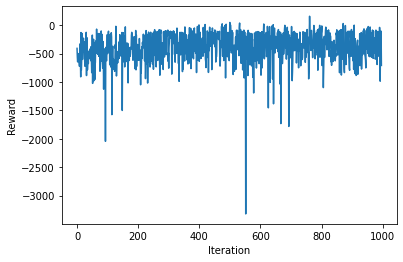

In [6]:
plt.plot(total_rewards)
plt.xlabel("Iteration")
plt.ylabel("Reward")
plt.show()

In [7]:
import time 

env.reset()
env.render()
def run_episode(env, weight):
    state = env.reset()
    time.sleep(5)
    total_reward = 0
    is_done = False
    # _ = True
    while not is_done:
        state = torch.from_numpy(state).float()                         # For matrix multiplication
        action = torch.argmax(torch.matmul(state, weight))            
        # Index with highest value from 1x2 matrix is selected
        state, reward, is_done, info = env.step(action.item())
        # print(info)
        # if _:
        #     print(state, "\n", action, "\n", torch.matmul(torch.from_numpy(state).float(), weight))
        #     _ = False
        total_reward += reward
        # time.sleep(0.01)
    return total_reward

In [8]:
run_episode(env, best_weight)

-235.7903811449293

In [9]:
env.close()